# Visualização de dados

Vamos aprender alguns gráficos básicos em python fazendo algumas visualizações sobre mulheres na Ciência de Dados no Brasil


![](https://media.giphy.com/media/zw69pUViBZCZW/giphy.gif)

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import re
%matplotlib inline

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [68]:
#importando o dataset
df = pd.read_csv('/content/drive/My Drive/bootcamp-mia/state_data_2021_data_viz.csv')

In [18]:
#imprimindo as 5  primeiras linhas
df.head()

,Unnamed: 0,Idade,Genero,UF,Regiao_origem,Nivel Ensino,Area Formacao,Situacao Trabalho,Setor,Trabalha como Gestao,...,Cargo Atual,Nivel,Faixa Salarial,Insatisfacao com a Empresa,Tempo XP em Dados,Tempo XP em Software,Criterios de escolha trabalho,Forma de trabalho atual,Forma de trabalho desejada,Faixa Salarial_number
0,0,38.0,Masculino,CE,NaN,Pós-graduação,Química / Física,Empregado (CLT),Marketing,1.0,...,NC,Gestor,de R$ 4.001/mês a R$ 6.000/mês,NaN,Mais de 10 anos,Não tive experiência na área de TI/Engenharia ...,Benefícios,Modelo 100% presencial,Modelo híbrido com dias fixos de trabalho pres...,6000.0
1,1,39.0,Masculino,BA,Sudeste,Pós-graduação,Economia/ Administração / Contabilidade / Fina...,Empreendedor ou Empregado (CNPJ),Consultoria,1.0,...,NC,Gestor,de R$ 6.001/mês a R$ 8.000/mês,NaN,de 2 a 3 anos,Não tive experiência na área de TI/Engenharia ...,Flexibilidade de trabalho remoto,Modelo híbrido flexível (o funcionário tem lib...,Modelo 100% remoto,8000.0
2,2,30.0,Masculino,SC,NaN,Pós-graduação,Computação / Engenharia de Software / Sistemas...,Empregado (CLT),Indústria,1.0,...,NC,Gestor,de R$ 8.001/mês a R$ 12.000/mês,O clima de trabalho/ambiente não é bom,de 1 a 2 anos,de 2 a 3 anos,Oportunidade de aprendizado e trabalhar com re...,Modelo 100% presencial,Modelo 100% remoto,12000.0
3,3,38.0,Feminino,SP,NaN,Pós-graduação,Outras,Empreendedor ou Empregado (CNPJ),Serviços,1.0,...,NC,Gestor,de R$ 12.001/mês a R$ 16.000/mês,Falta de maturidade analítica na empresa,Mais de 10 anos,Menos de 1 ano,"Propósito do trabalho e da empresa, Flexibilid...",Modelo 100% presencial,Modelo híbrido com dias fixos de trabalho pres...,16000.0
4,4,36.0,Masculino,SC,NaN,Pós-graduação,Outras Engenharias,Empreendedor ou Empregado (CNPJ),Varejo,1.0,...,NC,Gestor,de R$ 8.001/mês a R$ 12.000/mês,Gostaria de trabalhar em em outra área de atua...,de 1 a 2 anos,de 4 a 5 anos,Maturidade da empresa em termos de tecnologia ...,Modelo 100% presencial,Modelo 100% remoto,12000.0


#### Primeiro vamos ver o que tem nos nossos dados: 2465 linhas e 21 colunas (variáveis)

## Definição da Visualização

A Primeira etapa da nossa visualização é definir nossas perguntas: 
O que queremos responder com esses dados?

**1. Pergunta: Mulheres ganham menos que homens?**



## Primeiros Gráficos

Vamos analisar algumas coisas antes de responder essa pergunta

### 1. Distribuição de mulheres e homens no dataset

In [6]:
#nº de homens e mulheres
df['Genero'].value_counts()

Masculino    1924
Feminino      436
Outro           5
Name: Genero, dtype: int64

Text(0, 0.5, 'Total')

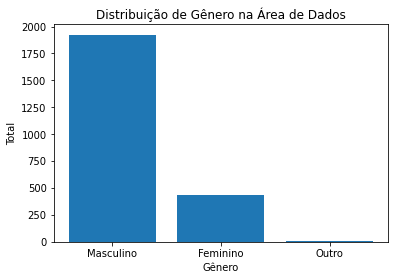

In [7]:
#gráfico da distribuição por gênero
plt.bar(df['Genero'].unique(), df['Genero'].value_counts())
plt.title('Distribuição de Gênero na Área de Dados')
plt.xlabel('Gênero')
plt.ylabel('Total')

Vamos gerar esse gráfico de um jeito mais bonito

Link de palletes do seaborn: [Palettes](https://seaborn.pydata.org/tutorial/color_palettes.html?highlight=palette)

Text(0.5, 1.0, "'Distribuição de Gênero na Área de Dados'")

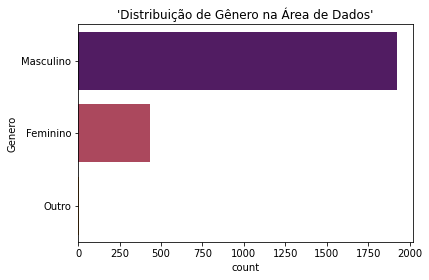

In [8]:
sns.countplot(y="Genero", data=df, palette="inferno", order=df['Genero'].value_counts().index) \
.set_title("'Distribuição de Gênero na Área de Dados'")

Vamos ver em gráfico de pizza

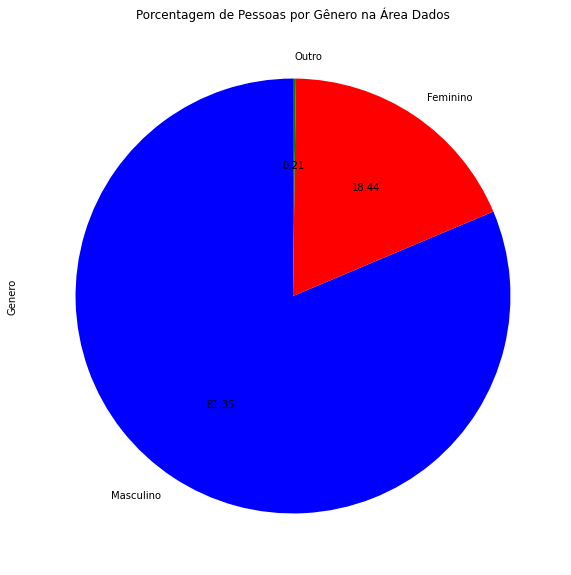

In [9]:
tmp = pd.DataFrame(df['Genero'].value_counts())
tmp.plot.pie(y='Genero', figsize=(10, 10),autopct='%.2f', title='Porcentagem de Pessoas por Gênero na Área Dados', 
                 startangle=90,legend=False, ylabel=None, colors=['blue', 'red', 'green'])

### 2. Distribuição de cargos 

3 formas de criar gráficos:
 - pelo matplotlib
 - pelo seaborn
 - direto pelo dataframe

In [10]:
#quantidade de cargos
df['Cargo Atual'].value_counts()

Cientista de Dados/Data Scientist                          357
Analista de BI/BI Analyst/Analytics Engineer               338
Analista de Dados/Data Analyst                             324
Engenheiro de Dados/Data Engineer                          300
Outro                                                      113
Analista de Negócios/Business Analyst                       96
Desenvolvedor ou Engenheiro de Software                     92
Engenheiro de Machine Learning/ML Engineer                  48
Outras Engenharias (não inclui dev)                         33
Estatístico                                                 25
Analista Administrativo                                     18
Analista de Inteligência de Mercado/Market Intelligence     18
Analista de Marketing                                       14
DBA/Administrador de Banco de Dados                         14
Analista de Sistemas/Analista de TI                         14
Técnico                                                

In [20]:
#vendo quantos valores faltantes há
df.isna().sum()

Unnamed: 0                          0
Idade                              24
Genero                              0
UF                                 26
Regiao_origem                    1934
Nivel Ensino                        0
Area Formacao                      54
Situacao Trabalho                   0
Setor                               0
Trabalha como Gestao                0
Cargo como Gestor(a)             1857
Cargo Atual                       508
Nivel                               0
Faixa Salarial                      0
Insatisfacao com a Empresa       1753
Tempo XP em Dados                   0
Tempo XP em Software                0
Criterios de escolha trabalho      14
Forma de trabalho atual             0
Forma de trabalho desejada          0
Faixa Salarial_number               0
dtype: int64

In [21]:
#substituir os valores faltantes por "Nada consta"
df['Cargo Atual'].fillna('Nada Consta', inplace=True)

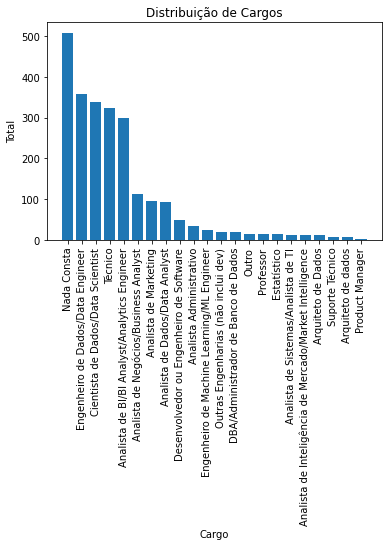

In [22]:
#plotando gráfico de barras

plt.bar(df['Cargo Atual'].unique(), df['Cargo Atual'].value_counts())
plt.title('Distribuição de Cargos')
plt.xlabel('Cargo')
plt.ylabel('Total')
plt.xticks(rotation=90);

Text(0.5, 1.0, "'Distribuição de Cargos Área de Dados'")

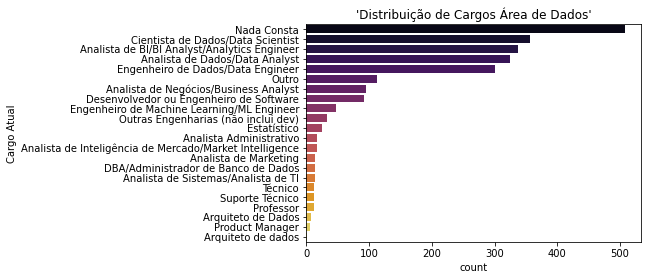

In [23]:
#o mesmo gráfico, mas utilizando a lib seaborn
sns.countplot(y="Cargo Atual", data=df, palette="inferno", order=df['Cargo Atual'].value_counts().index) \
.set_title("'Distribuição de Cargos Área de Dados'")

### 3. Distribuição de cargo e nível por gênero:

In [42]:
#agrupamento por gênero e cargo
tmp = df.groupby('Genero')['Cargo Atual'].value_counts()
tmp.head(20)

Genero    Cargo Atual                                            
Feminino  Analista de Dados/Data Analyst                             83
          Cientista de Dados/Data Scientist                          68
          Analista de BI/BI Analyst/Analytics Engineer               67
          Nada Consta                                                67
          Engenheiro de Dados/Data Engineer                          40
          Analista de Negócios/Business Analyst                      25
          Outro                                                      23
          Desenvolvedor ou Engenheiro de Software                    13
          Engenheiro de Machine Learning/ML Engineer                  9
          Estatístico                                                 9
          Analista Administrativo                                     6
          Analista de Inteligência de Mercado/Market Intelligence     5
          Professor                                                   

In [43]:
tmp = tmp.reset_index(name='total')
tmp.head(20)

,Genero,Cargo Atual,total
0,Feminino,Analista de Dados/Data Analyst,83
1,Feminino,Cientista de Dados/Data Scientist,68
2,Feminino,Analista de BI/BI Analyst/Analytics Engineer,67
3,Feminino,Nada Consta,67
4,Feminino,Engenheiro de Dados/Data Engineer,40
5,Feminino,Analista de Negócios/Business Analyst,25
6,Feminino,Outro,23
7,Feminino,Desenvolvedor ou Engenheiro de Software,13
8,Feminino,Engenheiro de Machine Learning/ML Engineer,9
9,Feminino,Estatístico,9


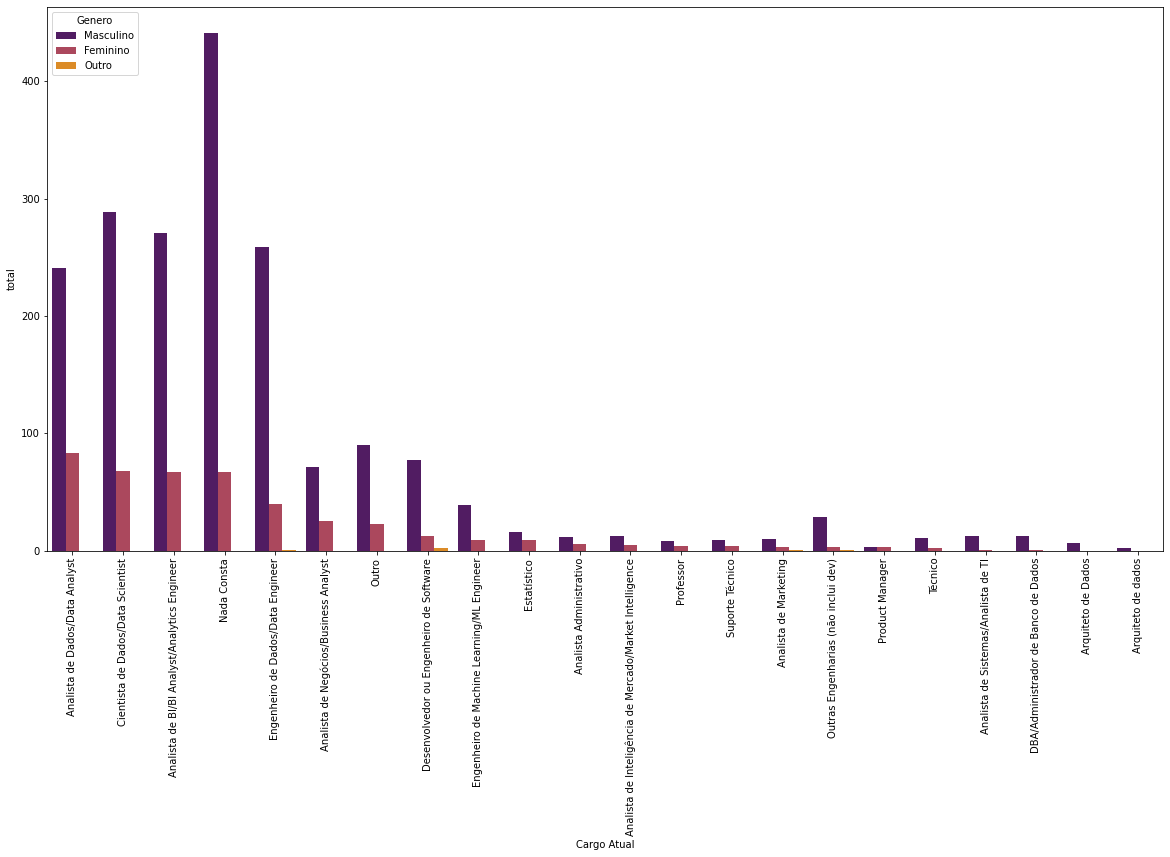

In [45]:
#gráfico de barras do cargo por gênero

plt.figure(figsize=(20,10))
sns.barplot(x='Cargo Atual', y='total', hue='Genero', data=tmp, hue_order=['Masculino', 'Feminino', 'Outro'], palette='inferno')
plt.xticks(rotation=90);

In [46]:
#agrupamento por gênero e nível de cargo
tmp = df.groupby('Genero')['Nivel'].value_counts()
tmp.head()

Genero     Nivel 
Feminino   Júnior    144
           Pleno     131
           Sênior     94
           Gestor     67
Masculino  Pleno     525
Name: Nivel, dtype: int64

In [47]:
tmp = tmp.reset_index(name='total')
tmp.head(20)

,Genero,Nivel,total
0,Feminino,Júnior,144
1,Feminino,Pleno,131
2,Feminino,Sênior,94
3,Feminino,Gestor,67
4,Masculino,Pleno,525
5,Masculino,Sênior,484
6,Masculino,Júnior,474
7,Masculino,Gestor,441
8,Outro,Júnior,3
9,Outro,Pleno,2


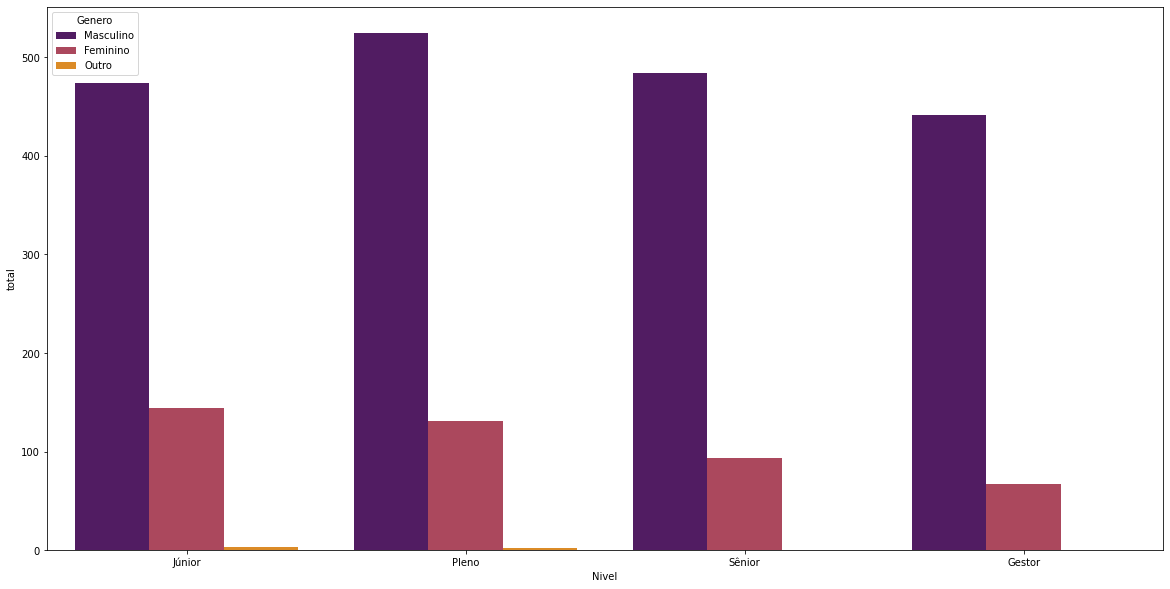

In [50]:
#gráfico de barras do nível do cargo por gênero
plt.figure(figsize=(20,10))
sns.barplot(x='Nivel', y='total', hue='Genero', data=tmp, hue_order=['Masculino', 'Feminino', 'Outro'], palette='inferno')

Essa visualização está boa? 

Conseguimos ver a diferença de nível caindo?

O que poderíamos mudar para melhorar?

### Vamos analisar os salários

Primeiro vamos fazer um histograma para analisar a distribuição geral dos salários

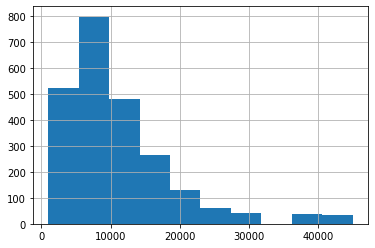

In [51]:
df['Faixa Salarial_number'].hist()

## Gráfico de Gênero vs Salário

Agora sim! Vamos ver a diferença de salários entre gêneros. 

Porém, não podemos comparar bananas com laranjas, vamos olhar primeiro somente para ciência de dados separando por nível.

In [69]:
df2 = df[df['Cargo Atual'].str.contains('Cientista de Dados', na=False)]

In [70]:
tmp = df2.groupby(['Genero', 'Nivel'])['Faixa Salarial_number'].mean()

In [71]:
tmp.head()

Genero     Nivel 
Feminino   Júnior     5615.384615
           Pleno      9600.000000
           Sênior    13882.352941
Masculino  Júnior     5247.191011
           Pleno     10896.825397
Name: Faixa Salarial_number, dtype: float64

In [72]:
tmp = tmp.reset_index(name='Salario Medio')
tmp.head()

,Genero,Nivel,Salario Medio
0,Feminino,Júnior,5615.384615
1,Feminino,Pleno,9600.000000
2,Feminino,Sênior,13882.352941
3,Masculino,Júnior,5247.191011
4,Masculino,Pleno,10896.825397


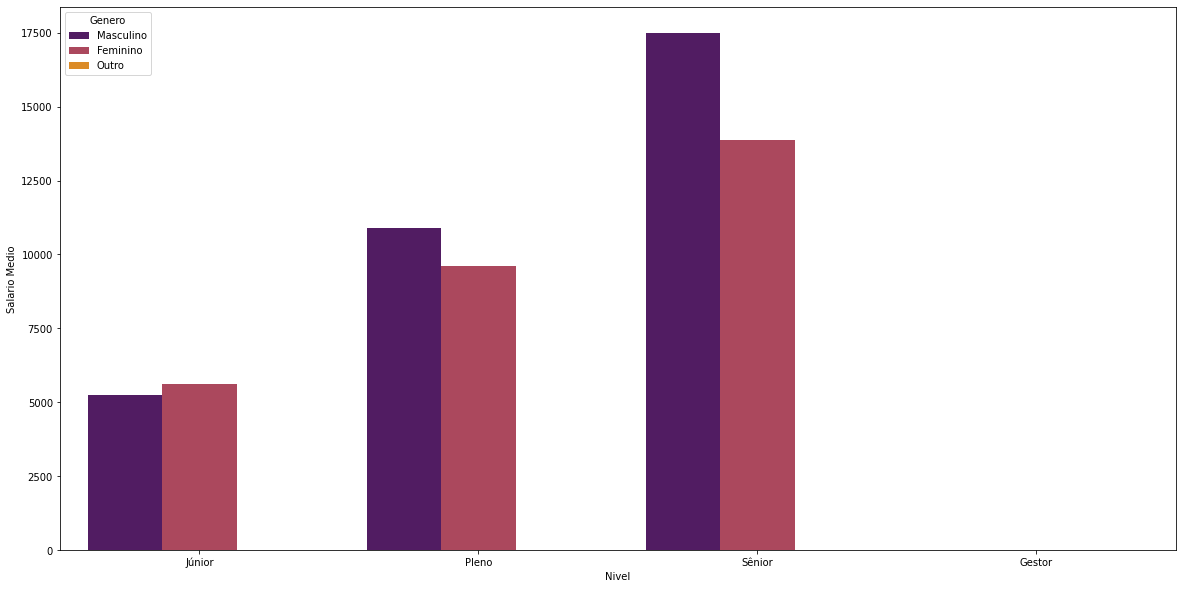

In [73]:
#analisando a média salarial por nível de cargo
plt.figure(figsize=(20,10))
sns.barplot(x='Nivel', y='Salario Medio', hue='Genero', data=tmp, 
order=['Júnior', 'Pleno', 'Sênior', 'Gestor'], 
palette='inferno', hue_order=['Masculino', 'Feminino', 'Outro'])

In [87]:
#analisando a média salarial por cargo
df3 = df[df['Cargo Atual'].str.contains('Cientista de Dados', na=False)]
tmp = df3.groupby(['Genero', 'Cargo Atual'])['Faixa Salarial_number'].mean()
tmp.head()

Genero     Cargo Atual                      
Feminino   Cientista de Dados/Data Scientist     9147.058824
Masculino  Cientista de Dados/Data Scientist    10847.750865
Name: Faixa Salarial_number, dtype: float64

In [88]:
tmp = tmp.reset_index(name='Salario Medio')
tmp.head()

,Genero,Cargo Atual,Salario Medio
0,Feminino,Cientista de Dados/Data Scientist,9147.058824
1,Masculino,Cientista de Dados/Data Scientist,10847.750865


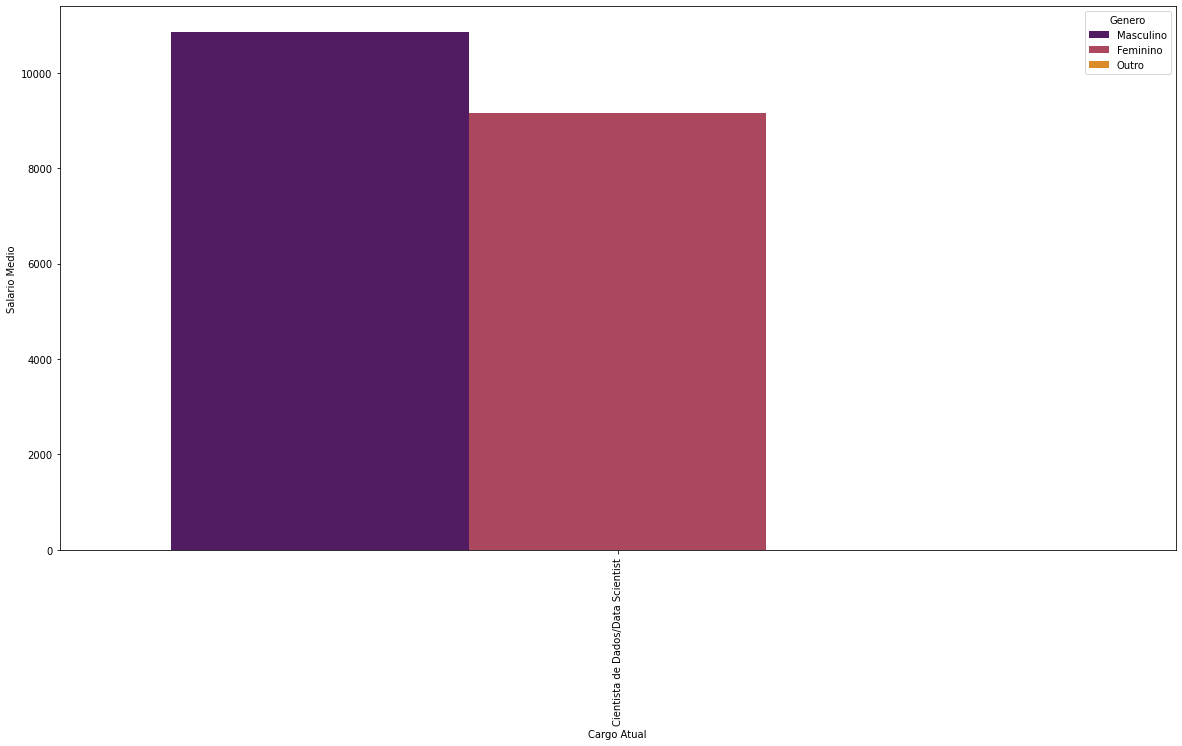

In [89]:
#gráfico da média salarial por cargo
plt.figure(figsize=(20,10))
sns.barplot(x='Cargo Atual', y='Salario Medio', hue = 'Genero', data=tmp,  palette='inferno', hue_order=['Masculino', 'Feminino', 'Outro'])
plt.xticks(rotation=90);

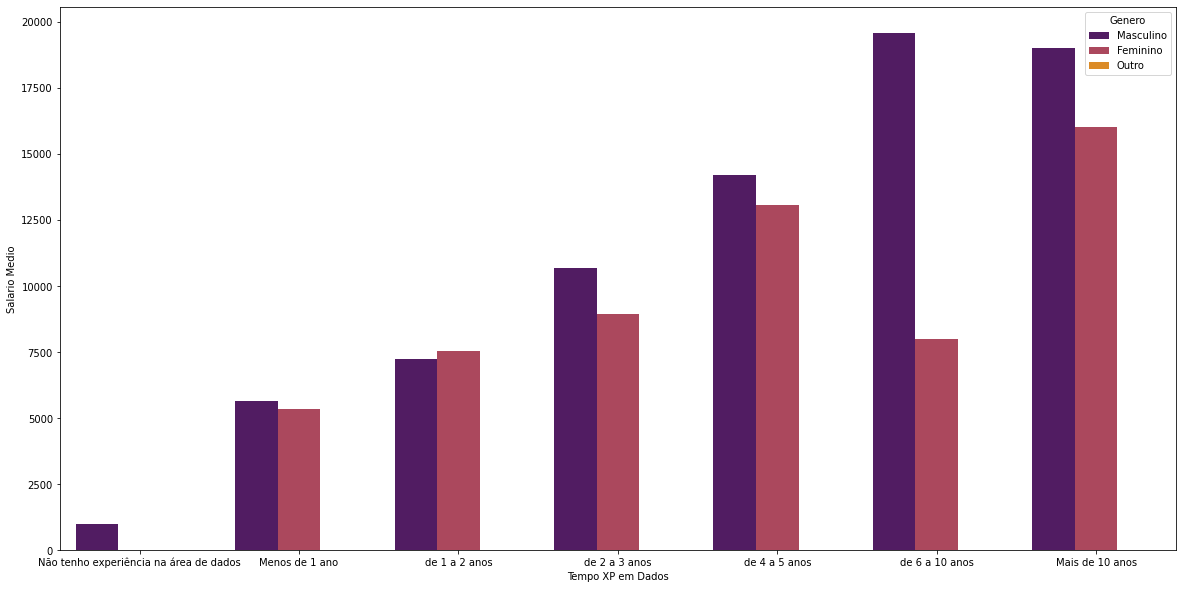

In [81]:
#Vamos ver isso de outra forma, o nível do cargo por tempo de experiência
tmp = df2.groupby(['Genero', 'Tempo XP em Dados'])['Faixa Salarial_number'].mean()
tmp = tmp.reset_index(name='Salario Medio')
plt.figure(figsize=(20,10))
sns.barplot(x='Tempo XP em Dados', y='Salario Medio', hue='Genero', data=tmp, order=['Não tenho experiência na área de dados','Menos de 1 ano', 'de 1 a 2 anos',
       'de 2 a 3 anos', 'de 4 a 5 anos', 'de 6 a 10 anos', 'Mais de 10 anos'],
            hue_order=['Masculino', 'Feminino', 'Outro'], palette='inferno')

---



1. Analise a diferença de salario para gestão, olhar a coluna: "Cargo como Gestor(a)"
2. Analise a diferença por formação, olhar as colunas "Nivel Ensino" e "Area Formacao"



### Análise da diferença de salario para gestão

In [90]:
# Separando os dados apenas para cargos de nível gestão
df4 = df[df['Nivel'].str.contains('Gestor', na=False)]

In [91]:
tmp = df4.groupby(['Genero', 'Nivel'])['Faixa Salarial_number'].mean()

In [92]:
tmp.head()

Genero     Nivel 
Feminino   Gestor    15731.343284
Masculino  Gestor    17072.562358
Name: Faixa Salarial_number, dtype: float64

In [93]:
tmp = tmp.reset_index(name='Salario Medio')
tmp.head()

,Genero,Nivel,Salario Medio
0,Feminino,Gestor,15731.343284
1,Masculino,Gestor,17072.562358


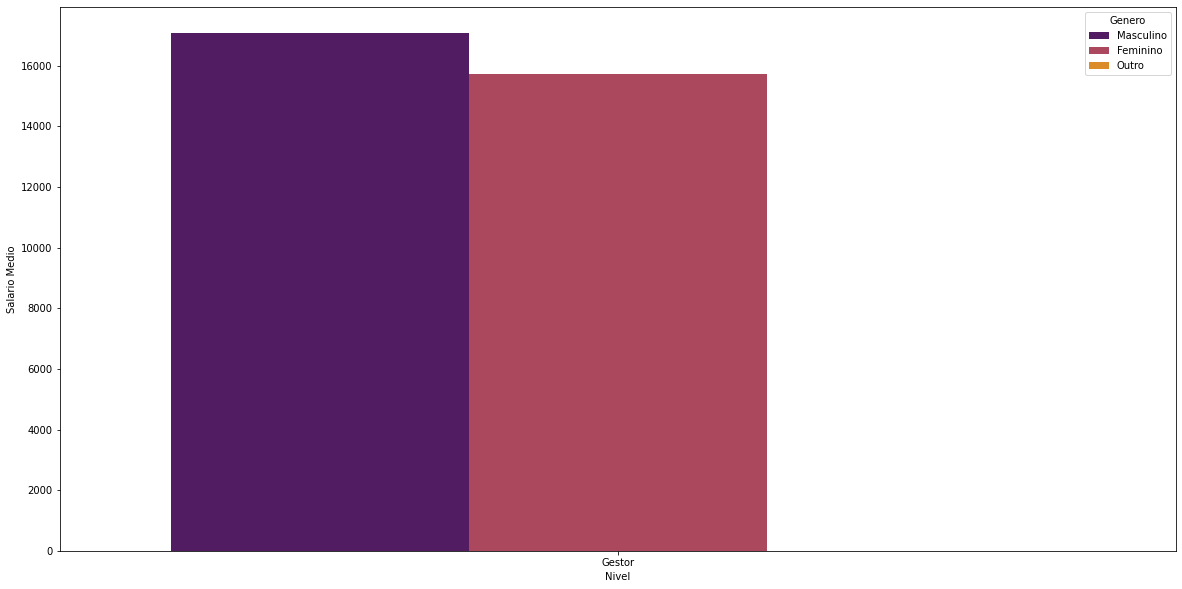

In [94]:
#média salarial do nível gestor por gênero
plt.figure(figsize=(20,10))
sns.barplot(x='Nivel', y='Salario Medio', hue='Genero', data=tmp, palette='inferno', 
hue_order=['Masculino', 'Feminino', 'Outro'])

### Análise da diferença de salário por formação

In [95]:
tmp = df.groupby(['Genero', 'Area Formacao'])['Faixa Salarial_number'].mean()

In [96]:
tmp.head()

Genero    Area Formacao                                                   
Feminino  Ciências Biológicas/Farmácia/Medicina/Área da Saúde                  7866.666667
          Ciências Sociais                                                     5833.333333
          Computação / Engenharia de Software / Sistemas de Informação/ TI    10094.936709
          Economia/ Administração / Contabilidade / Finanças                   9153.846154
          Estatística/ Matemática / Matemática Computacional                   9415.094340
Name: Faixa Salarial_number, dtype: float64

In [97]:
tmp = tmp.reset_index(name='Salario Medio')
tmp.head()

,Genero,Area Formacao,Salario Medio
0,Feminino,Ciências Biológicas/Farmácia/Medicina/Área da ...,7866.666667
1,Feminino,Ciências Sociais,5833.333333
2,Feminino,Computação / Engenharia de Software / Sistemas...,10094.936709
3,Feminino,Economia/ Administração / Contabilidade / Fina...,9153.846154
4,Feminino,Estatística/ Matemática / Matemática Computaci...,9415.094340


(array([0, 1, 2, 3, 4]), <a list of 5 Text major ticklabel objects>)

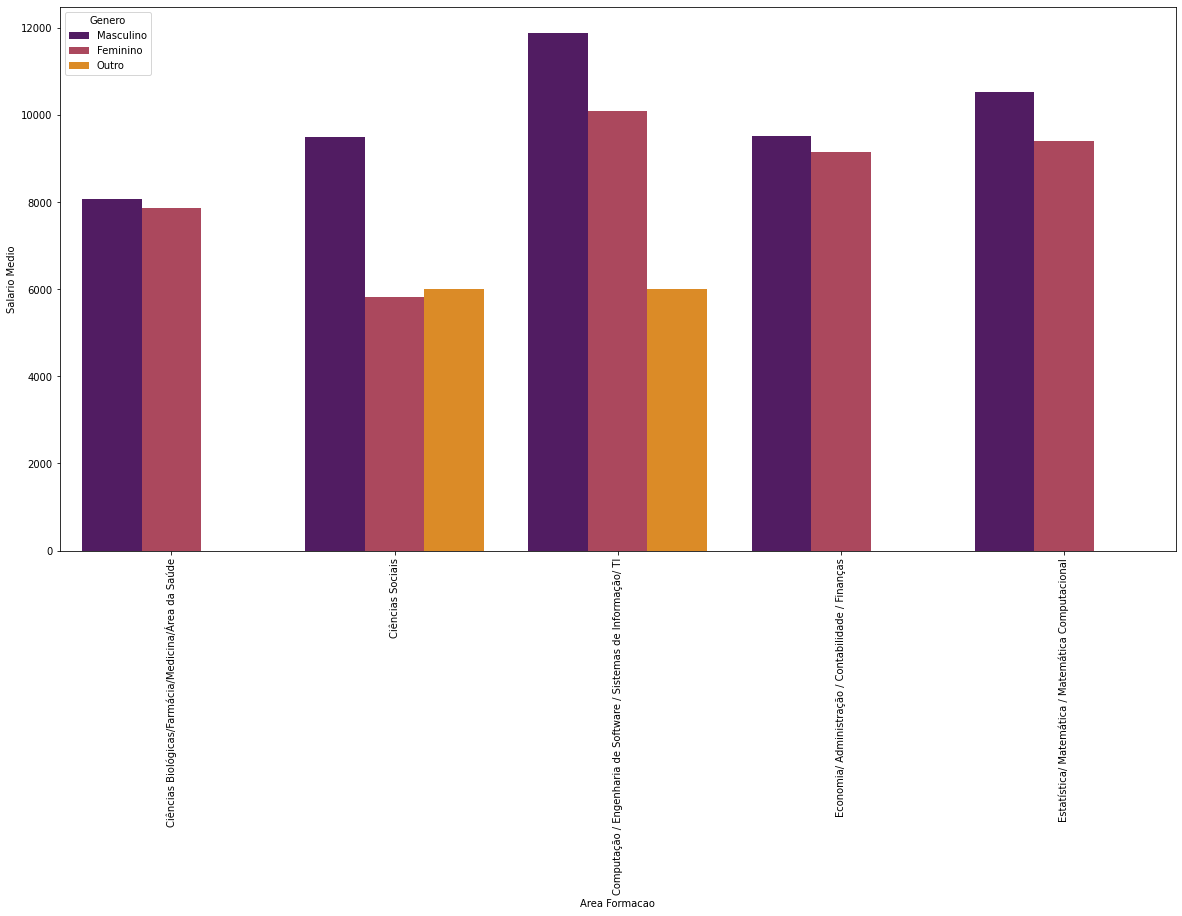

In [99]:
#gráfico da média salarial por área de formação
plt.figure(figsize=(20,10))
sns.barplot(x='Area Formacao', y='Salario Medio', hue='Genero', data=tmp, 
order=['Ciências Biológicas/Farmácia/Medicina/Área da Saúde', 
'Ciências Sociais', 'Computação / Engenharia de Software / Sistemas de Informação/ TI',
'Economia/ Administração / Contabilidade / Finanças', 'Estatística/ Matemática / Matemática Computacional'], 
palette='inferno', hue_order=['Masculino', 'Feminino', 'Outro'])
plt.xticks(rotation=90)

### Análise da diferença de salário por nível de escolaridade

In [104]:
tmp = df.groupby(['Genero', 'Nivel Ensino'])['Faixa Salarial_number'].mean()
tmp = tmp.reset_index(name='Salario Medio')

In [102]:
tmp = tmp.reset_index(name='Salario Medio')
tmp.head()

,Genero,Nivel Ensino,Salario Medio
0,Feminino,Doutorado ou Phd,11111.111111
1,Feminino,Estudante de Graduação,3761.904762
2,Feminino,Graduação/Bacharelado,8243.055556
3,Feminino,Mestrado,11212.121212
4,Feminino,Não tenho graduação formal,12285.714286


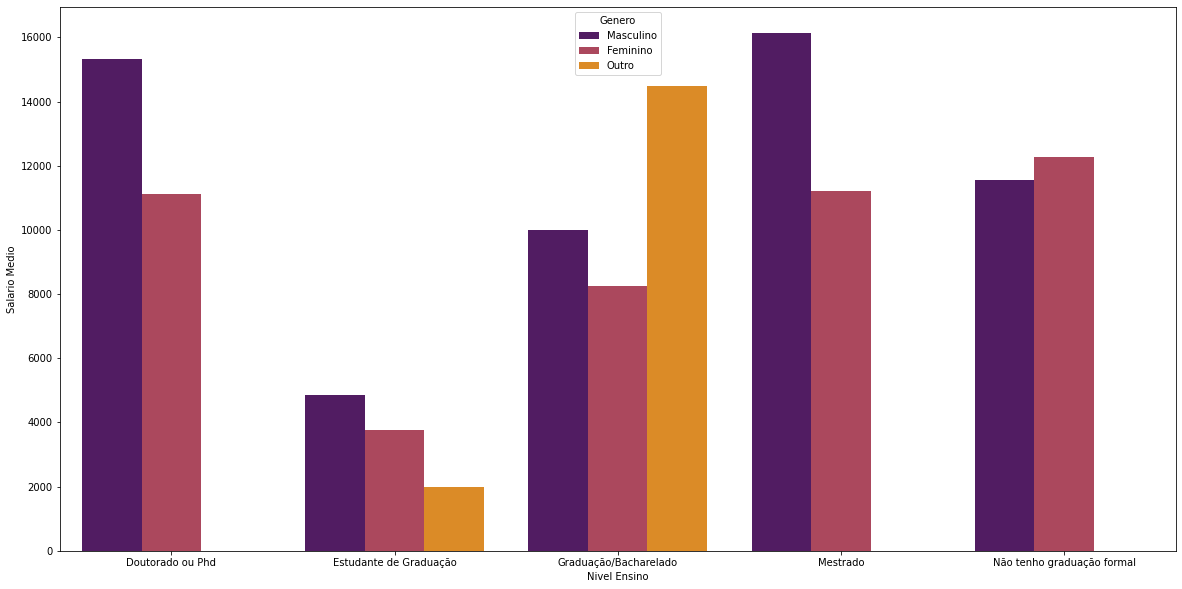

In [106]:
#gráfico da média salarial por nível de escolaridade
plt.figure(figsize=(20,10))
sns.barplot(x='Nivel Ensino', y='Salario Medio', hue='Genero', data=tmp, 
order=['Doutorado ou Phd', 'Estudante de Graduação', 'Graduação/Bacharelado',
'Mestrado', 'Não tenho graduação formal'], 
palette='inferno', hue_order=['Masculino', 'Feminino', 'Outro'])

#### Fim do código

---